Figure 1 : Number of T4 cells

In [1]:
### Import packages
# similar to maria_draft.ipynb
import os
from glob import glob
import pandas as pd
#import fafbseg
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load T4 dataset
#work pc : 
path = r'D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\T4_inputs'
#home pc
#path = r'C:\Users\maria\OneDrive\Documents\GitHub\connectome-analysis-main_thesis\T4_inputs'
filename = glob(path +"\\"+"*.xlsx")
#dataset = pd.read_excel(filename)
# what is most efficient? Load all excels in a list and then choose? or one by one?
excel_list  = []
for i in filename:
    print(f'Importing:{i}')
    excelPath = os.path.join(path,i)
    df = pd.read_excel(excelPath)
    excel_list.append(df)

Importing:D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\T4_inputs\T4a_neurons_input_count_R_19Dec2023.xlsx
Importing:D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\T4_inputs\T4b_neurons_input_count_R_19Dec2023.xlsx
Importing:D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\T4_inputs\T4c_neurons_input_count_R_19Dec2023.xlsx
Importing:D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\T4_inputs\T4d_neurons_input_count_R_19Dec2023.xlsx


In [3]:
db = pd.concat(excel_list)
print(f'\n\nCell types in the database: {db.symbol.unique()}, total = {len(db.symbol.unique())}')



Cell types in the database: ['CT1' 'Mi1' 'Mi9' 'Tm3' nan 'T4a' 'Mi4' 'TmY15' 'C3' 'T4c' 'T4d' 'T4b'
 'Mi10' 'C2' 'Pm1_Tm2' 'Pm3' 'Tm2' 'PS125' 'Me-Lo-2-N.I.' 'Pm1a_Tm1'
 'TmY17' 'Dm10' 'T3' 'Pm1_Tm1' 'Pm1a_Mi1' 'Tm9' 'Tm1' 'Tm20' 'TmY10' 'Tm4'
 'Mi13' 'Pm4' 'Pm2' 'Tm16' 'ML1' 'Tm4a'], total = 36


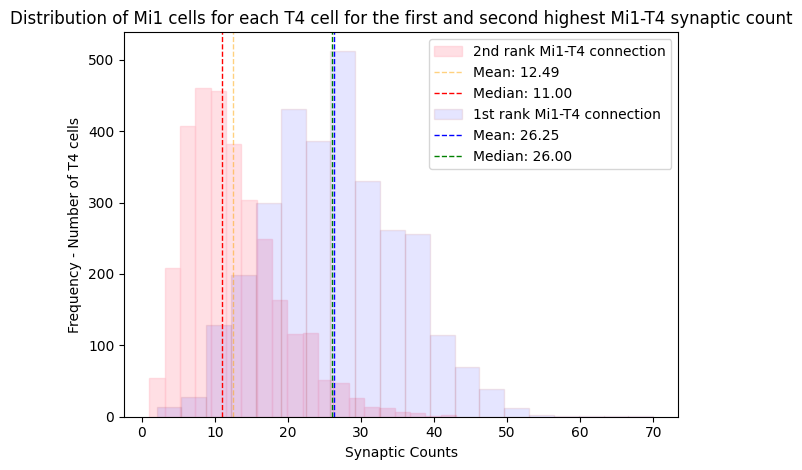

In [4]:
# Plot how many T4 cells are per Mi1 in a histogram
#symbols_to_select = ['T4a', 'T4b', 'T4c', 'T4d']
symbols_to_select = ['Mi1'] # here I select the Mi1s for each singular T4 cell # to run the same analysis for other neurons...change the name of the df.
db_Mi1 = db.loc[db['symbol'].isin(symbols_to_select)]

# here I find the 2nd highest Mi1 in the T4 input list
 
# Sort the DataFrame within each group (T4) by 'counts' in descending order
db_sorted = db_Mi1.sort_values(by='counts', ascending=False)
 
# Filter groups with more than one row
# lambda function filters each input (group from optic_lobe_id) for 2 and more rows
groups_with_more_than_one_row = db_sorted.groupby('optic_lobe_id').filter(lambda x: len(x) > 1)
 
# groupby to get the second row within each group
second_highest_mi1 = groups_with_more_than_one_row.groupby('optic_lobe_id').nth(1)
#print(second_highest_mi1)
plt.hist(second_highest_mi1['counts'], bins=20, edgecolor = 'pink', color='pink', alpha=0.5, label='2nd rank Mi1-T4 connection')
mean_value = second_highest_mi1['counts'].mean()
median_value = second_highest_mi1['counts'].median()
plt.axvline(mean_value, color='orange',alpha=0.5, linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='red', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')

# Filter through the highest Mi1 contributor for each T4 cell
highest_mi1 = db_Mi1.groupby('optic_lobe_id').agg({'counts': 'max'}).reset_index()
# Plot the histogram for the highest Mi1-T4 synaptic count
plt.hist(highest_mi1['counts'], bins=20, edgecolor='brown', color='blue', alpha=0.1, label='1st rank Mi1-T4 connection')
mean_value = highest_mi1['counts'].mean()
median_value = highest_mi1['counts'].median()
plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')

plt.xlabel('Synaptic Counts')
plt.ylabel('Frequency - Number of T4 cells')
plt.title('Distribution of Mi1 cells for each T4 cell for the first and second highest Mi1-T4 synaptic count')
plt.legend()
plt.tight_layout()
plt.savefig('Distribution of Mi1 cells for each T4 cell for the first and second highest Mi1-T4 synaptic count.png')
plt.show()

In [6]:
### load dataset for each Mi1 its T4 output, this takes a minute to run...
### home pc
#db_Mi1 = pd.read_excel(r'C:\Users\maria\OneDrive\Documents\GitHub\connectome-analysis-main_thesis\Mi1_outputs\Mi1_neurons_output_count_R_25Jan2024.xlsx')
### work pc 
db_Mi1 = pd.read_excel(r'D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\Mi1_outputs\Mi1_neurons_output_count_R_25Jan2024.xlsx')
### Filter through the outputs of Mi1 to find T4s
symbols_to_select = ['T4a', 'T4b', 'T4c', 'T4d']
db_Mi1_T4 = db_Mi1.loc[db_Mi1['symbol'].isin(symbols_to_select)]

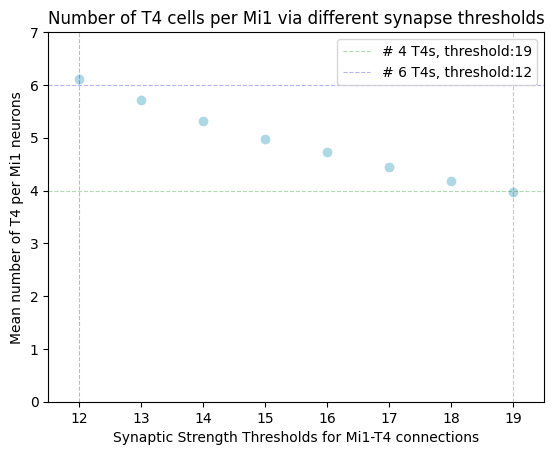

In [27]:
#### Here I need to plot the number of mean T4 cells per Mi1 depending on the synapse threshold derive from the dual distribution above.
#### How do I decide the range of thresholds? >75% of each daatset..? How arbitrary...
# calculate mean for a range of thresholds with a step of 1, and store it to an array and plot against threshold count
symbols_to_select = ['T4a', 'T4b', 'T4c', 'T4d']
db_Mi1 = db_Mi1.loc[db_Mi1['symbol'].isin(symbols_to_select)]
### set threshold & filter the database
threshold = np.arange(1,60,1) # (1,60,1) , (10,21,1)or why don't I just do the whole range and put a pretty colored low oppacity background on the range of intreset...?

# initiate empty lists
number_of_t4 = []
mean_for_each_mi1 = []
# calculate the mean for each Mi1 neuron
for i,value in enumerate (threshold):
    db_Mi1_T4 = db_Mi1[db_Mi1['counts']>=value]
    number_of_t4.append(db_Mi1_T4.groupby('optic_lobe_id').size().values)  # number of cells not counts...remember for lists you have to append
    # now the number_of_t4 has the number of T4s per Mi1 in a list ss
    mean_for_each_mi1.append(np.mean(number_of_t4[i]))

### plotting    
plt.scatter(threshold, mean_for_each_mi1, color = 'lightblue' )
plt.ylim(0,7)
plt.xlim(11.5,19.5)
plt.axhline(4, color='green', alpha = 0.3, linestyle = 'dashed', linewidth = 0.8, label='# 4 T4s, threshold:19')
plt.axhline(6, color='blue', alpha = 0.3, linestyle = 'dashed', linewidth = 0.8,label = '# 6 T4s, threshold:12')
plt.axvline(19, color='green', alpha = 0.3, linestyle = 'dashed', linewidth = 0.8)
plt.axvline(12, color='blue', alpha = 0.3, linestyle = 'dashed', linewidth = 0.8)
plt.xlabel('Synaptic Strength Thresholds for Mi1-T4 connections')
plt.ylabel('Mean number of T4 per Mi1 neurons')
plt.title('Number of T4 cells per Mi1 via different synapse thresholds')
plt.legend(bbox_to_anchor=(0.5,0.5,0.5,0.5),loc='upper right') # x,y,h,w
plt.savefig('Number of T4 cells under different threholds (11-20 range).png',dpi=300)
plt.savefig('Number of T4 cells under different threholds (11-20 range).pdf',dpi=300)

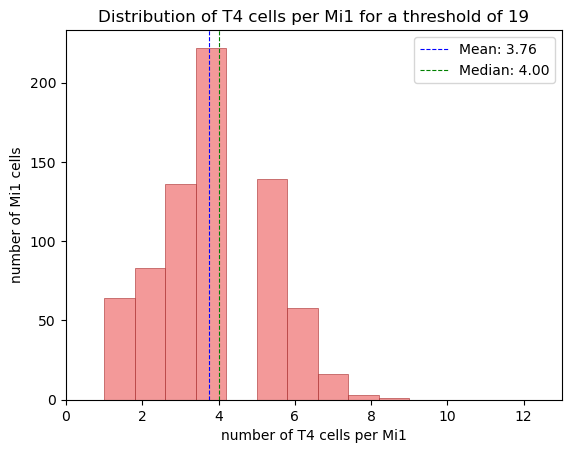

In [7]:
## Now I would like to plot for each threshold a distribution of the number of T4 cells for the Mi1s 
## this will allow me to investigate if the distributions are wide, and whether I can take the mean..
thres = 18
thres = threshold[thres] # threshold 20 would be in position 19
plt.hist(number_of_t4[thres], color = 'lightcoral', edgecolor = 'brown', linewidth = 0.5, alpha =0.8)
plt.ylabel('number of Mi1 cells')
plt.xlabel('number of T4 cells per Mi1')
plt.title(f'Distribution of T4 cells per Mi1 for a threshold of {thres}')
mean_value = np.mean(number_of_t4[thres])
median_value = np.median(number_of_t4[thres])
plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=0.8, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=0.8, label=f'Median: {median_value:.2f}')
plt.xlim(0,13)
plt.savefig(f'Distribution of T4 cells per Mi1 for a threshold of {thres}')
plt.legend()

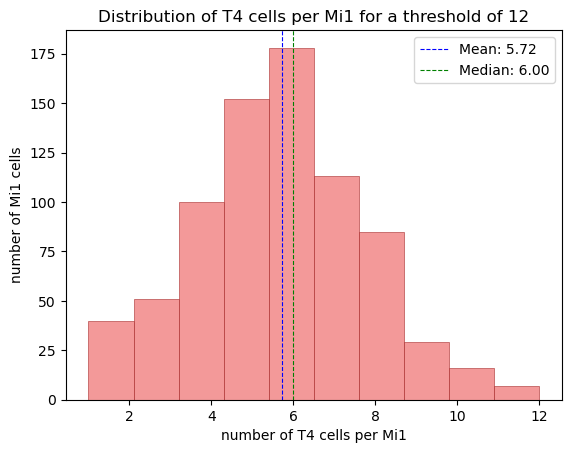

In [8]:
## Now I would like to plot for each threshold a distribution of the number of T4 cells for the Mi1s 
## this will allow me to investigate if the distributions are wide, and whether I can take the mean..
thres = 11 # threshold 20 would be in position 19
thres = threshold[thres] 
plt.hist(number_of_t4[thres], color = 'lightcoral', edgecolor = 'brown', linewidth = 0.5, alpha = 0.8)
plt.ylabel('number of Mi1 cells')
plt.xlabel('number of T4 cells per Mi1')
plt.title(f'Distribution of T4 cells per Mi1 for a threshold of {thres}')
mean_value = np.mean(number_of_t4[thres])
median_value = np.median(number_of_t4[thres])
plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=0.8, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=0.8, label=f'Median: {median_value:.2f}')
plt.legend()

In [6]:
# load dataset for each Mi1 its T4 output
db_Mi1 = pd.read_excel(r'C:\Users\maria\OneDrive\Documents\GitHub\connectome-analysis-main_thesis\Mi1_outputs\Mi1_neurons_output_count_R_25Jan2024.xlsx')
### Filter through the outputs of Mi1 to find T4s
symbols_to_select = ['T4a', 'T4b', 'T4c', 'T4d']
db_Mi1_T4 = db_Mi1.loc[db_Mi1['symbol'].isin(symbols_to_select)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'C3'),
  Text(1, 0, 'TmY15'),
  Text(2, 0, 'CT1'),
  Text(3, 0, 'Mi4'),
  Text(4, 0, 'T4a'),
  Text(5, 0, 'Mi1'),
  Text(6, 0, 'Mi9'),
  Text(7, 0, 'T4b'),
  Text(8, 0, 'Tm3'),
  Text(9, 0, 'C2'),
  Text(10, 0, 'Pm1_Tm2'),
  Text(11, 0, 'Pm1a_Tm1'),
  Text(12, 0, 'Pm3'),
  Text(13, 0, 'PS125'),
  Text(14, 0, 'T4c'),
  Text(15, 0, 'T4d'),
  Text(16, 0, 'Tm16'),
  Text(17, 0, 'T3'),
  Text(18, 0, 'Me-Lo-2-N.I.'),
  Text(19, 0, 'Mi10'),
  Text(20, 0, 'Pm2'),
  Text(21, 0, 'Tm2')])

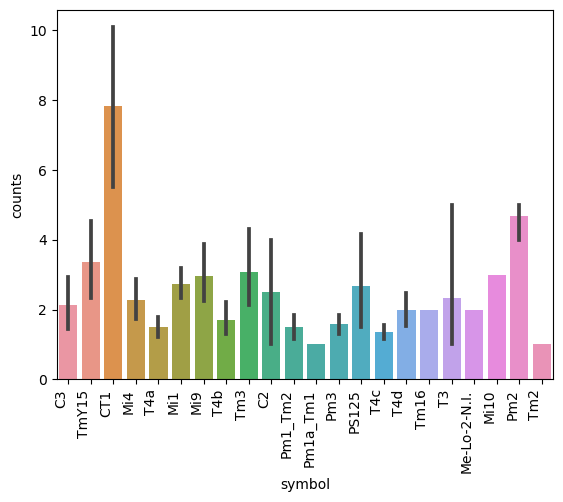

In [10]:
#### Here I will investigate the outlier of the number of T4s with a max Mi1 connections of 1-5 synapses...
# just filter through the dataframe with counts lower than 5
symbols_to_select = ['Mi1'] # here I select the Mi1s for each singular T4 cell
db_Mi1 = db.loc[db['symbol'].isin(symbols_to_select)]
#highest_mi1 = db_Mi1.loc[db_Mi1.groupby('optic_lobe_id')['counts'].idxmax()]
highest_mi1 = db_Mi1.groupby('optic_lobe_id').agg({'counts': 'max'}).reset_index()
outlier_data = highest_mi1[highest_mi1['counts'] <=5]
# after I need the inputs to these T4 cells. I need the db and filter it through those T4 cells outlier_data['optic_lobe_id]
# how can i do this : with isin
# Filter rows in db based on values in a column of outlier_data
# outlier_data here i need postsynaptic_ID, or optic_lobe_id
db = pd.concat(excel_list)
input_outlier_data = db[db['optic_lobe_id'].isin(outlier_data['optic_lobe_id'])]
# i need te box plot for each T4 cell now..For a unique optic lobe id 

# or also for all T4s
sns.barplot(x='symbol', y='counts', data=input_outlier_data)
plt.xticks(rotation=90, ha='right')

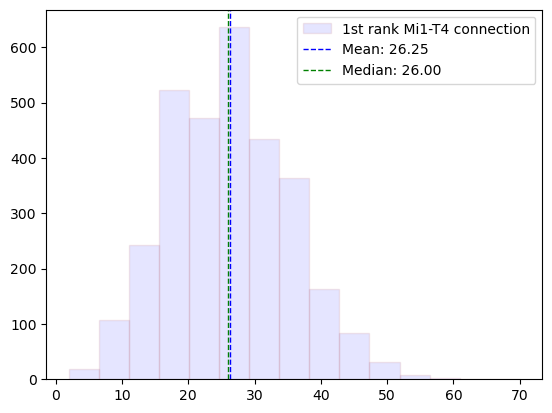

In [159]:
# Filter through the highest Mi1 contributor for each T4 cell
symbols_to_select = ['Mi1'] # here I select the Mi1s for each singular T4 cell
db_Mi1 = db.loc[db['symbol'].isin(symbols_to_select)]
#highest_mi1 = db_Mi1.loc[db_Mi1.groupby('optic_lobe_id')['counts'].idxmax()]
highest_mi1 = db_Mi1.groupby('optic_lobe_id').agg({'counts': 'max'}).reset_index()
# Plot the histogram for the highest Mi1-T4 synaptic count
plt.hist(highest_mi1['counts'], bins=15, edgecolor='brown', color='blue', alpha=0.1, label='1st rank Mi1-T4 connection')
mean_value = highest_mi1['counts'].mean()
median_value = highest_mi1['counts'].median()
plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.legend()

In [4]:
### Now I want to plot the percentage of coverage for the 1st and 2nd rank Mi1s
# load dataset for each Mi1 its T4 output
db_Mi1 = pd.read_excel(r'C:\Users\maria\OneDrive\Documents\GitHub\connectome-analysis-main_thesis\Mi1_outputs\Mi1_neurons_output_count_R_25Jan2024.xlsx')
### Filter through the outputs of Mi1 to find T4s
symbols_to_select = ['T4a', 'T4b', 'T4c', 'T4d']
db_Mi1_T4 = db_Mi1.loc[db_Mi1['symbol'].isin(symbols_to_select)]

       Unnamed: 0 guess  author      presynaptic_ID  counts  \
0               1   Mi1   100.0  720575940630505297      27   
1               2   Mi1   100.0  720575940625448394      14   
2               9   Mi1   100.0  720575940631816332       7   
3              14   Mi1   100.0  720575940632034724       5   
4              30   Mi1   100.0  720575940627344783       3   
...           ...   ...     ...                 ...     ...   
17598       42195   Mi1   100.0  720575940621491226       8   
17599       42196   Mi1   100.0  720575940619213771       8   
17600       42199   Mi1   100.0  720575940612393000       4   
17601       42222   Mi1   100.0  720575940618013745       1   
17602       42232   Mi1   100.0  720575940615590034       1   

          postsynaptic_ID symbol optic_lobe_id  dorso-ventral  \
0      720575940638662708    Mi1       T4a-R20            NaN   
1      720575940638662708    Mi1       T4a-R20            NaN   
2      720575940638662708    Mi1       T4a-R20  

Text(0.5, 1.0, 'Distribution of max count of T4 percentage cell presence for each Mi1 ')

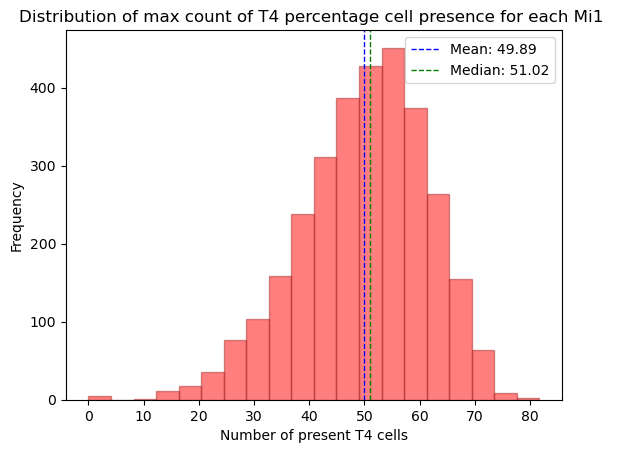

In [14]:
### Plot the Distribution of the coverage of the highest Mi1-T4 connection for each Mi1
symbols_to_select = ['Mi1']
db_Mi1_T4 = db.loc[db['symbol'].isin(symbols_to_select)]
# Group by 'optic_lobe_id' and find the highest element of 'counts' within each group
highest_counts_per_group = db_Mi1_T4.groupby('optic_lobe_id')['counts'].max()

# Calculate the percentage of coverage for each group based on the highest element
percentage_coverage = ((-highest_counts_per_group +db_Mi1_T4.groupby('optic_lobe_id')['counts'].sum()) / db_Mi1_T4.groupby('optic_lobe_id')['counts'].sum()) * 100

# Merge percentage of coverage back to the original DataFrame
db_Mi1_T4_with_coverage = pd.merge(db_Mi1_T4, percentage_coverage, on='optic_lobe_id', suffixes=('', '_coverage'))

# Rename the column to reflect the calculated percentage
db_Mi1_T4_with_coverage.rename(columns={'counts_coverage': 'percentage_coverage'}, inplace=True)

# Display or further process db_Mi1_T4_with_coverage
print(db_Mi1_T4_with_coverage)

### Calculate the mean, median and STD  of the synaptic strength of Mi1-T4 cells
T4_occurrence = db_Mi1_T4_with_coverage.groupby('optic_lobe_id')['percentage_coverage'].max()
#print(T4_occurrence)
T4_occurrence.hist(grid=False, bins=20, edgecolor = 'brown', color='red', alpha=0.5)
mean_value = T4_occurrence.mean()
median_value = T4_occurrence.median()
plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}') #:.2f} : start, .2 number of digits after decimal, f
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.legend()

plt.xlabel('Number of present T4 cells')
plt.ylabel('Frequency')
plt.title('Distribution of max count of T4 percentage cell presence for each Mi1 ')
#plt.savefig(f'Distribution of T4 cell presence for each Mi1 (threshold {threshold}).png')

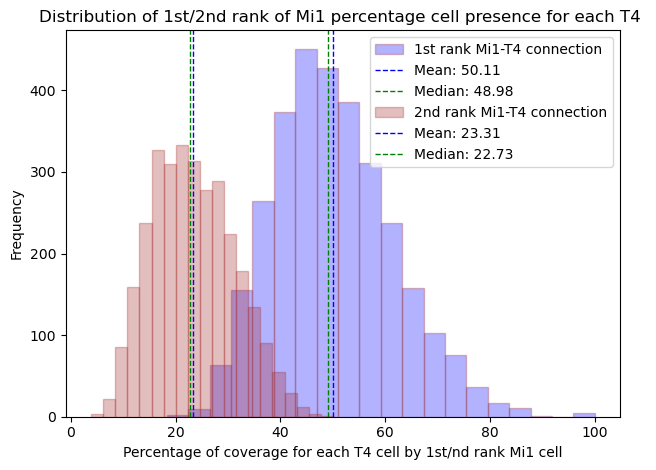

In [7]:
symbols_to_select = ['Mi1']
db_Mi1_T4 = db.loc[db['symbol'].isin(symbols_to_select)]
db_Mi1_T4 = db_Mi1_T4.sort_values(by='counts', ascending=False)

# Calculate the sum of 'counts' for each group of 'optic_lobe_id'
grouped_sum = db_Mi1_T4.groupby('optic_lobe_id')['counts'].transform('sum')

# Calculate the percentage coverage for each row
percentage_coverage = (db_Mi1_T4['counts'] / grouped_sum) * 100

# Add the calculated percentages as a new column
db_Mi1_T4['percentage_coverage'] = percentage_coverage
# now i want to select the 1st rank Mi1-T4. The df is sorrted so now i can use  groupby.nth()
first_rank = db_Mi1_T4.groupby('optic_lobe_id').nth(0)
plt.hist(first_rank['percentage_coverage'], bins=20, edgecolor = 'brown', color='blue', alpha=0.3, label='1st rank Mi1-T4 connection')
### Calculate the mean, median and STD  of the synaptic strength of Mi1-T4 cells
mean_value = first_rank['percentage_coverage'].mean()
median_value = first_rank['percentage_coverage'].median()
plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}') #:.2f} : start, .2 number of digits after decimal, f
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
# now i want to select the 2nd rank Mi1-T4
second_rank = db_Mi1_T4.groupby('optic_lobe_id').nth(1)
plt.hist(second_rank['percentage_coverage'], bins=20, edgecolor = 'brown', color='brown', alpha=0.3, label='2nd rank Mi1-T4 connection')
### Calculate the mean, median and STD  of the synaptic strength of Mi1-T4 cells
mean_value = second_rank['percentage_coverage'].mean()
median_value = second_rank['percentage_coverage'].median()
plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}') #:.2f} : start, .2 number of digits after decimal, f
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')


plt.xlabel('Percentage of coverage for each T4 cell by 1st/nd rank Mi1 cell')
plt.ylabel('Frequency')
plt.title('Distribution of 1st/2nd rank of Mi1 percentage cell presence for each T4 ')
#plt.savefig(f'Distribution of T4 cell presence for each Mi1 (threshold {threshold}).png')
plt.legend()
plt.tight_layout()

720575940634682487    8
720575940624121322    7
720575940631433487    7
720575940624599836    7
720575940610254037    7
                     ..
720575940627009598    1
720575940639223203    1
720575940627632259    1
720575940627082329    1
720575940630697576    1
Name: presynaptic_ID, Length: 775, dtype: int64


Text(0.5, 1.0, 'Distribution of number of T4 cells per Mi1')

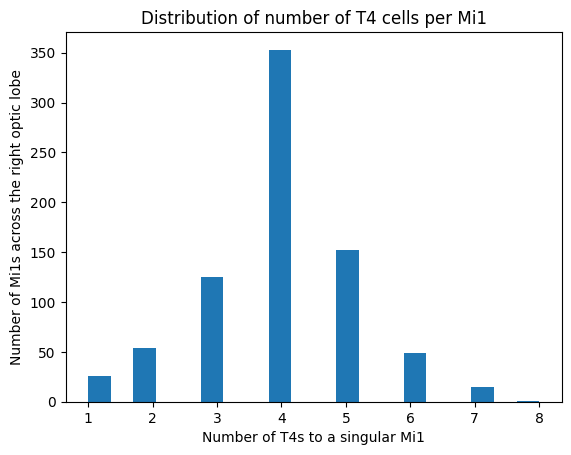

In [5]:
symbols_to_select = ['Mi1']
db_Mi1_T4 = db.loc[db['symbol'].isin(symbols_to_select)]
db_Mi1_T4 = db_Mi1_T4.sort_values(by='counts', ascending=False)

# Step 1: Group the DataFrame by 'optic_lobe_id' and find the row with the highest 'counts' value in each group
highest_counts_rows = db_Mi1_T4.groupby('optic_lobe_id').nth(0)

# Step 2: Calculate the frequency of appearance of values in the 'postsynaptic_ID' column
presynaptic_id_frequency = highest_counts_rows['presynaptic_ID'].value_counts()

# Display the frequency of appearance
print(presynaptic_id_frequency)
plt.hist(presynaptic_id_frequency,bins = 20)
plt.ylabel('Number of Mi1s across the right optic lobe')
plt.xlabel('Number of T4s to a singular Mi1')
plt.title('Distribution of number of T4 cells per Mi1')

In [6]:
## Now after a short talk with Miriam, I would like to plot on flywire all the the Mi1s per distribution of the above plot
# Here I get the number of the values of all 
# I want for 1,2,3,4,5,6,7,8
presynaptic_id_frequency = highest_counts_rows['presynaptic_ID'].value_counts()
# extracting for each number...

In [7]:
# Add frequency counts to highest_counts_rows
highest_counts_rows['frequency_counts'] = highest_counts_rows['presynaptic_ID'].map(presynaptic_id_frequency)

# Display the modified DataFrame
print(highest_counts_rows)

               Unnamed: 0 guess author      presynaptic_ID  counts  \
optic_lobe_id                                                        
T4a-R1               1496   Mi1    100  720575940624769771      13   
T4a-R10               523   Mi1    100  720575940629180422      16   
T4a-R100             6853   Mi1    100  720575940644950216      34   
T4a-R101             5777   Mi1    100  720575940629129679      25   
T4a-R102             6797   Mi1    100  720575940629042639      18   
...                   ...   ...    ...                 ...     ...   
T4d-R95              5084   Mi1    100  720575940621505718      17   
T4d-R96              5497   Mi1    100  720575940615266866      16   
T4d-R97              5973   Mi1    100  720575940621263014      10   
T4d-R98              5256   Mi1    100  720575940607385283      30   
T4d-R99              6135   Mi1    100  720575940606944898      26   

                  postsynaptic_ID symbol  dorso-ventral  frequency_counts  
optic_lobe_id

In [8]:
merged_df = pd.merge(highest_counts_rows, presynaptic_id_frequency, on='presynaptic_ID', how='left')
# Rename the column containing the frequency counts
merged_df.rename(columns={'presynaptic_ID_y': 'frequency_counts'}, inplace=True)
number_of_t4 = 6 #[1,8]
filtered_df = merged_df[merged_df['counts']==number_of_t4]
filtered_df['postsynaptic_ID'].to_csv(f't4_id_s_new_for_{number_of_t4}.txt', index=False)

In [9]:
number_of_t4 = 6 #[1,8]
filtered_df = merged_df[merged_df['counts']==number_of_t4]
filtered_df['postsynaptic_ID'].to_csv(f't4_id_s_new_for_{number_of_t4}.txt', index=False)

In [22]:
merged_df.to_csv(r'D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\proofreading-tables\six_t4s_per_mi1.csv')
#merged_df = pd.read_csv('D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\proofreading-tables\six_t4s_per_mi1.csv')
#this means it got merged on github...

In [12]:
merged_df = pd.read_csv(r'D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\proofreading-tables\six_t4s_per_mi1.csv')

In [15]:
merged_df[merged_df['frequency_counts']==5]

,Unnamed: 0.1,Unnamed: 0,guess,author,presynaptic_ID,counts,postsynaptic_ID,symbol,dorso-ventral,frequency_counts
2,2,6853,Mi1,100,720575940644950216,34,720575940646150435,Mi1,NaN,5
3,3,5777,Mi1,100,720575940629129679,25,720575940642820388,Mi1,NaN,5
4,4,6797,Mi1,100,720575940629042639,18,720575940626489644,Mi1,NaN,5
9,9,6393,Mi1,100,720575940632811112,40,720575940614564146,Mi1,NaN,5
10,10,6748,Mi1,100,720575940637201461,26,720575940626962746,Mi1,NaN,5
...,...,...,...,...,...,...,...,...,...,...
3071,3071,4262,Mi1,100,720575940610979590,33,720575940638179561,Mi1,NaN,5
3076,3076,4050,Mi1,100,720575940621189358,31,720575940612065522,Mi1,NaN,5
3079,3079,5711,Mi1,100,720575940647995769,26,720575940640995573,Mi1,NaN,5
3085,3085,5973,Mi1,100,720575940621263014,10,720575940617488641,Mi1,NaN,5


In [10]:
filtered_df['presynaptic_ID']

419     720575940628694671
985     720575940624628420
1717    720575940643633352
1824    720575940624733769
2783    720575940637228206
2941    720575940636102042
Name: presynaptic_ID, dtype: int64

In [18]:
merged_df

,Unnamed: 0,guess,author,presynaptic_ID,counts,postsynaptic_ID,symbol,optic_lobe_id,dorso-ventral,count
0,1842,Mi1,100.0,720575940631432901,70,720575940627286153,Mi1,T4a-R44,NaN,4
1,43240,Mi1,100.0,720575940603327916,64,720575940620613409,Mi1,T4c-R736,NaN,4
2,38399,Mi1,100.0,720575940618491038,60,720575940604636789,Mi1,T4c-R669,NaN,4
3,20085,Mi1,100.0,720575940629246586,59,720575940604142453,Mi1,T4c-R348,NaN,6
4,15739,Mi1,100.0,720575940626850678,55,720575940628097768,Mi1,T4c-R294,NaN,4
...,...,...,...,...,...,...,...,...,...,...
3083,33182,Mi1,100.0,720575940634569442,4,720575940647120419,Mi1,T4d-R604,NaN,5
3084,4864,Mi1,100.0,720575940613102053,3,720575940624529703,Mi1,T4d-R112,NaN,5
3085,4263,Mi1,100.0,720575940620780270,3,720575940624740500,Mi1,T4c-R70,NaN,4
3086,43002,Mi1,100.0,720575940613102053,2,720575940629489602,Mi1,T4a-R711,NaN,5


In [35]:
highest_counts_rows['presynaptic_ID'].to_csv('lalall.txt',index=False)